In [189]:
import pandas as pd

data_row=pd.read_csv("/Users/withmocha/Desktop/DATA/Capston Design(2024)/Data(24.03.12)/data(use)/data(0401)/train_data.csv")

data_row

,Unnamed: 0,word,predict
0,203848,걸,fishing
1,172011,벌,fishing
2,155125,때,fishing
3,200050,확인,fishing
4,112212,대도,fishing
...,...,...,...
209236,109034,연구,fishing
209237,179352,예,fishing
209238,105159,전시,No fishing
209239,21263,부합,No fishing


In [190]:
data_row.isnull().sum()

Unnamed: 0    0
word          0
predict       0
dtype: int64

In [191]:
data_row.drop(columns=["Unnamed: 0"],inplace=True)

In [192]:
data_row

,word,predict
0,걸,fishing
1,벌,fishing
2,때,fishing
3,확인,fishing
4,대도,fishing
...,...,...
209236,연구,fishing
209237,예,fishing
209238,전시,No fishing
209239,부합,No fishing


In [193]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [194]:
print(data_row.iloc[1,0]==data_row.iloc[2,0])

False


In [195]:
A=le.fit_transform(data_row['word'])

In [196]:
A.dtype

dtype('int64')

In [197]:
for i in range(data_row.shape[0]):
    data_row.iloc[i,0]=A[i]

In [198]:
data=data_row

In [199]:
A=le.fit_transform(data['predict'])

In [200]:
data

,word,predict
0,255,fishing
1,2351,fishing
2,1687,fishing
3,6845,fishing
4,1403,fishing
...,...,...
209236,3948,fishing
209237,4053,fishing
209238,5088,No fishing
209239,2598,No fishing


In [201]:
A

array([1, 1, 1, ..., 0, 0, 0])

In [202]:
for i in range(data.shape[0]):
    data.iloc[i,1]=A[i]

In [203]:
data

,word,predict
0,255,1
1,2351,1
2,1687,1
3,6845,1
4,1403,1
...,...,...
209236,3948,1
209237,4053,1
209238,5088,0
209239,2598,0


In [204]:
import matplotlib.pyplot as plt
import numpy as np

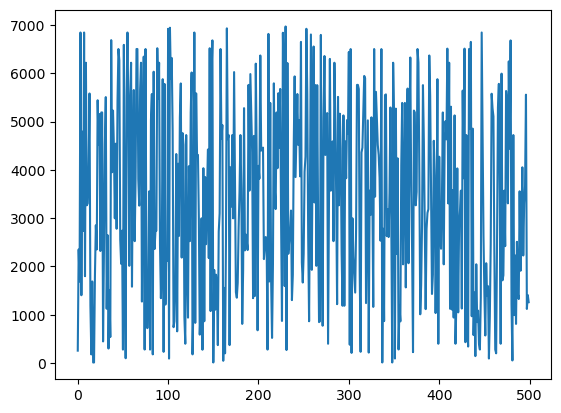

In [205]:
plt.plot(data['word'][:500])

In [206]:
data

,word,predict
0,255,1
1,2351,1
2,1687,1
3,6845,1
4,1403,1
...,...,...
209236,3948,1
209237,4053,1
209238,5088,0
209239,2598,0


In [207]:
data2=data

In [208]:
data2

,word,predict
0,255,1
1,2351,1
2,1687,1
3,6845,1
4,1403,1
...,...,...
209236,3948,1
209237,4053,1
209238,5088,0
209239,2598,0


In [209]:
#data_2=pd.DataFrame(index=range(0,6000),columns=['word','predict'])

In [210]:
#from sklearn.preprocessing import StandardScaler

#scaler=StandardScaler()
#data_2=pd.DataFrame(scaler.fit_transform(data2),columns=['word','predict'])

In [211]:
#data_2

,word,predict
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
...,...,...
5995,NaN,NaN
5996,NaN,NaN
5997,NaN,NaN
5998,NaN,NaN


In [212]:
#for i in range(data_2.shape[0]):
    #data_2.iloc[i,0]=data.iloc[i,0]
    #data_2.iloc[i,1]=data.iloc[i,1]

In [213]:
#data_2

,word,predict
0,255,1
1,2351,1
2,1687,1
3,6845,1
4,1403,1
...,...,...
5995,6845,1
5996,1791,0
5997,5709,0
5998,4272,0


In [214]:
#data=data_2

In [215]:
data.astype('int32').dtypes

word       int32
predict    int32
dtype: object

In [216]:
x_train=pd.DataFrame(data=data['word'],columns=['word'])

In [217]:
x_train

,word
0,255
1,2351
2,1687
3,6845
4,1403
...,...
5995,6845
5996,1791
5997,5709
5998,4272


In [218]:

y_train=pd.DataFrame(data=data['predict'],columns=['predict'],copy=True)

In [219]:

y_train

,predict
0,1
1,1
2,1
3,1
4,1
...,...
5995,1
5996,0
5997,0
5998,0


In [220]:

x_train.astype('int32').dtypes
y_train.astype('int32').dtypes


predict    int32
dtype: object

In [221]:
data=x_train

In [222]:
target=y_train

In [223]:
import numpy as np
from sklearn.model_selection import train_test_split

In [224]:
x_train['word']=x_train['word'].astype(float)
y_train['predict']=y_train['predict'].astype(float)

In [225]:
x_train,x_valid,y_train,y_valid=train_test_split(data,target,test_size=0.2,shuffle=True,stratify=target)

In [226]:
print(x_train.dtypes)
print(y_train.dtypes)
print(x_valid.dtypes)

word    float64
dtype: object
predict    float64
dtype: object
word    float64
dtype: object


In [227]:

from xgboost import XGBClassifier
#eta=0.1,max_depth=2,n_estimators=10,min_child_weight=0.5,gamma=10
# 모델 선언 예시
model = XGBClassifier()
model.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [228]:
y_pred=pd.DataFrame(model.predict(x_valid),columns=['predict'])

In [229]:
y_valid

,predict
211,1.0
2894,0.0
2140,0.0
3212,0.0
692,1.0
...,...
5841,1.0
3044,1.0
3360,1.0
689,0.0


In [230]:
y_pred

,predict
0,0
1,0
2,0
3,0
4,1
...,...
1195,1
1196,0
1197,1
1198,0


In [231]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_valid,y_pred)*100)

66.66666666666666


In [232]:
test_data=pd.read_csv("/Users/withmocha/Desktop/DATA/Capston Design(2024)/Data(24.03.12)/data(use)/data(small)/test/test_data_small.csv")

In [233]:
test_data

,Unnamed: 0,word,predict
0,0,상시,NO fishing
1,1,우편,NO fishing
2,2,요금,NO fishing
3,3,근거,fishing
4,4,구분,NO fishing
...,...,...,...
195,195,세탁,fishing
196,196,실업,NO fishing
197,197,맹점,NO fishing
198,198,걸로,NO fishing


In [234]:
test_data.drop(columns=['Unnamed: 0'],inplace=True)

In [187]:
x_test=pd.DataFrame(data=test_data['word'],columns=['word'])

In [188]:
x_test

,word
0,상시
1,우편
2,요금
3,근거
4,구분
...,...
195,세탁
196,실업
197,맹점
198,걸로


In [162]:
y_test=pd.DataFrame(data=test_data['predict'],columns=['predict'])

In [163]:
y_test

,predict
0,NO fishing
1,NO fishing
2,NO fishing
3,fishing
4,NO fishing
...,...
195,fishing
196,NO fishing
197,NO fishing
198,NO fishing


In [164]:
#le = LabelEncoder()

In [165]:
x_test=le.fit_transform(x_test['word'])
y_test=le.fit_transform(y_test['predict'])

In [166]:
x_test

array([ 90, 115, 114,  32,  24,  13,  10, 109, 173, 184,  38,  25,  47,
       121,  27,  41,  36, 162,  39,  44,  18,  26,  82,  77,  85, 125,
       171, 116, 148, 157,  37,  60, 179,  22,  28,  57, 146, 118,  59,
        75, 131, 130,  78, 170,  94,  78,  86,  68,  87,  63, 121,  72,
       163,  76, 181, 129, 169,   0, 178, 124,  95, 182,  89,  91, 184,
        97, 102,  30,   7, 172, 152,   5,  64,  34, 180,  12, 117,   4,
       119,  54,  52,  79, 101, 174, 110, 133, 159,  42, 164,   2, 134,
         1,  67, 157,  46,  19,   9, 166, 104,  45,   6, 155, 168,  23,
        11, 135,  43, 154,  93,  47,  48, 140,  14, 145, 137, 147,  20,
       161,  70, 143,  69,   8,  38, 132,  97, 177,   6, 113, 120,  74,
       111,  65, 144,  99, 150, 103, 142,  73,  15,  49,  58,  51,  40,
       139, 136,  96, 151, 167, 149, 183, 122, 127, 185,  35, 138,  55,
         5, 107, 112, 153, 123, 141,  71,  33,  98,  80,  58,  16,  53,
        50,  81,  29, 108, 108,  88,  84,  61,  21, 165, 160, 10

In [167]:
y_test

array([0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1])

In [168]:
x_test=pd.DataFrame(data=x_test,columns=['word'])
y_test=pd.DataFrame(data=y_test,columns=['predict'])

In [169]:
x_test

,word
0,90
1,115
2,114
3,32
4,24
...,...
195,92
196,105
197,56
198,17


In [170]:
y_test

,predict
0,0
1,0
2,0
3,1
4,0
...,...
195,1
196,0
197,0
198,0


In [171]:
x_test

,word
0,90
1,115
2,114
3,32
4,24
...,...
195,92
196,105
197,56
198,17


In [172]:
y_test

,predict
0,0
1,0
2,0
3,1
4,0
...,...
195,1
196,0
197,0
198,0


In [173]:
pred=model.predict(x_test)

In [174]:
pred=pd.DataFrame(data=pred,columns=['predict'])

In [175]:
pred

,predict
0,0
1,0
2,0
3,1
4,1
...,...
195,0
196,0
197,0
198,0


In [176]:
y_test

,predict
0,0
1,0
2,0
3,1
4,0
...,...
195,1
196,0
197,0
198,0


In [177]:
print(accuracy_score(y_test,pred)*100)

57.99999999999999
